#### Equações de Lorentz:
   $$ \frac{dx}{dt} = \sigma(y-x) \,\, , \quad \frac{dy}{dt} = rx - y - xz \,\, , \quad \frac{dz}{dt} = xy - bz$$
Em que $\sigma$, $b$ e $r$ são constantes. 

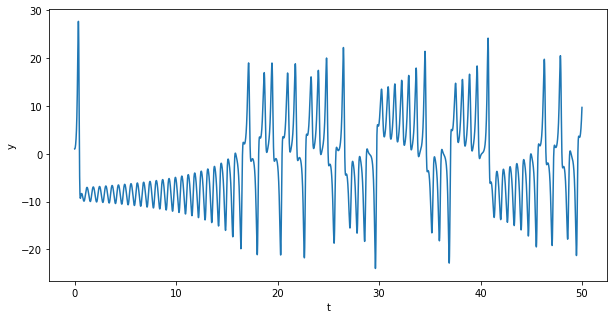

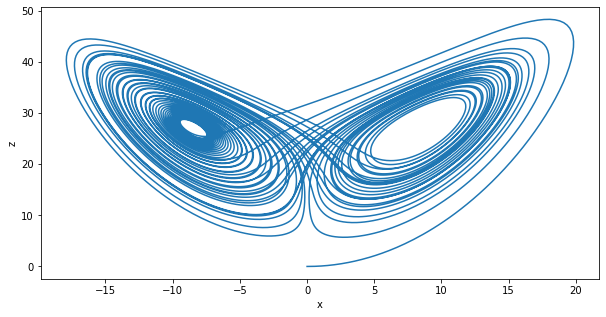

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10.0
r_const = 28.0
b = 8/3
x0 = 0.0
y0 = 1.0
z0 = 0.0

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    
    fx = sigma * (y - x)
    fy = r_const * x - y - x * z
    fz = x * y - b * z

    return np.array([fx , fy , fz], float)

t0 = 0
tf = 50
N = 12700
h = (tf - t0) / N

tPontos = np.arange(t0,tf,h)
xPontos = []
yPontos = []
zPontos = []

r = np.array([x0,y0,z0],float)
for t in tPontos:
    xPontos.append(r[0])
    yPontos.append(r[1])
    zPontos.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5*k1, t+0.5*h)
    k3 = h * f(r + 0.5*k2, t+0.5*h)
    k4 = h * f(r + k3, t+h)
    r += (k1 + 2*k2 + 2*k3 + k4) /6 

plt.figure(figsize = (10,5))
plt.plot(tPontos,yPontos)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

plt.figure(figsize = (10,5))
plt.plot(xPontos,zPontos)
plt.xlabel("x")
plt.ylabel("z")
plt.show()